<a href="https://colab.research.google.com/github/EDafee1/bk_hungarian_heart_disease_dev/blob/main/Capstone_BK_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump

In [62]:
header = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('/content/drive/MyDrive/datasets/processed.hungarian.csv', names=header)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [63]:
df = df[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'num']]
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,2,185,0,0.0,0
1,29,1,2,120,0,160,0,0.0,0
2,29,1,2,140,0,170,0,0.0,0
3,30,0,1,170,1,170,0,0.0,0
4,31,0,2,100,1,150,0,0.0,0


In [64]:
df = df[df['trestbps'] != '?']

In [65]:
df = df[df['restecg'] != '?']

In [66]:
df

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,2,185,0,0.0,0
1,29,1,2,120,0,160,0,0.0,0
2,29,1,2,140,0,170,0,0.0,0
3,30,0,1,170,1,170,0,0.0,0
4,31,0,2,100,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,0,94,1,2.5,1
290,54,0,3,130,1,100,1,0.0,1
291,56,1,4,155,0,150,1,3.0,1
292,58,0,2,180,0,110,1,1.0,1


In [67]:
df = df.dropna()
df

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,2,185,0,0.0,0
1,29,1,2,120,0,160,0,0.0,0
2,29,1,2,140,0,170,0,0.0,0
3,30,0,1,170,1,170,0,0.0,0
4,31,0,2,100,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,0,94,1,2.5,1
290,54,0,3,130,1,100,1,0.0,1
291,56,1,4,155,0,150,1,3.0,1
292,58,0,2,180,0,110,1,1.0,1


In [68]:
df = df[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'num']].astype(float)
df

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,num
0,28.0,1.0,2.0,130.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,0.0,160.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,0.0,170.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,1.0,170.0,0.0,0.0,0.0
4,31.0,0.0,2.0,100.0,1.0,150.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,0.0,94.0,1.0,2.5,1.0
290,54.0,0.0,3.0,130.0,1.0,100.0,1.0,0.0,1.0
291,56.0,1.0,4.0,155.0,0.0,150.0,1.0,3.0,1.0
292,58.0,0.0,2.0,180.0,0.0,110.0,1.0,1.0,1.0


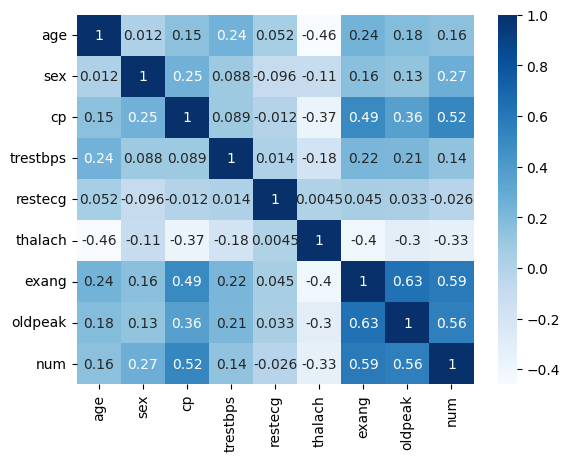

In [72]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

<Axes: ylabel='num'>

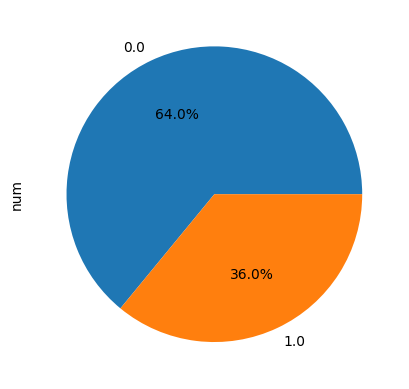

In [50]:
df['num'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [52]:
X = df.drop(['num'], axis=1)
y = df[['num']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [56]:
model = RandomForestClassifier(max_depth=2, random_state=0)

In [58]:
model.fit(X_train, y_train)

<ipython-input-58-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [59]:
pred = model.predict(X_test)

In [60]:
acc = accuracy_score(y_test, pred)
acc

0.9152542372881356

In [61]:
dump(model, 'RMC_heart_disease_Classification.joblib')

['RMC_heart_disease_Classification.joblib']